# MULTI LAYER PERCEPTRON CLASSIFIER

# Ví dụ 1

In [ ]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 200 # number of points per class
d = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j

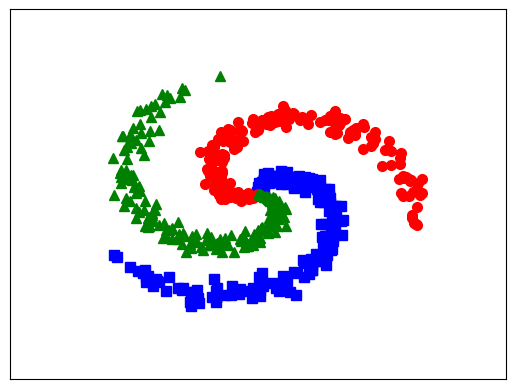

In [ ]:
plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);

plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.savefig('example_points.png', bbox_inches='tight', dpi = 600)
plt.show()

In [ ]:
def softmax(V):
  e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
  Z = e_V / e_V.sum(axis = 0)
  return Z

In [ ]:
def cost(Y, Yhat):
  return -np.sum(Y*np.log(Yhat))/Y.shape[1]

In [ ]:
from scipy import sparse
def convert_labels(y, C = 3):
  Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
  return Y

In [ ]:
d0 = 2
d1 = h = 100 # size of hidden layer
d2 = C = 3
# initialize parameters randomly
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate

In [ ]:
for i in range(10000):
## Feedforward
  Z1 = np.dot(W1.T, X) + b1
  A1 = np.maximum(Z1, 0)
  Z2 = np.dot(W2.T, A1) + b2
  Yhat = softmax(Z2)

  # print loss after each 1000 iterations
  if i %1000 == 0:
  # compute the loss: average cross-entropy loss
    loss = cost(Y, Yhat)
    print("iter %d, loss: %f" %(i, loss))

  # backpropagation
  E2 = (Yhat - Y )/N
  dW2 = np.dot(A1, E2.T)
  db2 = np.sum(E2, axis = 1, keepdims = True)
  E1 = np.dot(W2, E2)
  E1[Z1 <= 0] = 0 # gradient of ReLU
  dW1 = np.dot(X, E1.T)
  db1 = np.sum(E1, axis = 1, keepdims = True)
  W1 += -eta*dW1
  b1 += -eta*db1
  W2 += -eta*dW2
  b2 += -eta*db2

iter 0, loss: 1.098679
iter 1000, loss: 0.131288
iter 2000, loss: 0.046788
iter 3000, loss: 0.031338
iter 4000, loss: 0.025377
iter 5000, loss: 0.022063
iter 6000, loss: 0.019929
iter 7000, loss: 0.018410
iter 8000, loss: 0.017239
iter 9000, loss: 0.016302


In [ ]:
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
acc = 100*np.mean(predicted_class == y)
print('training accuracy: %.2f %%' % (acc))

training accuracy: 99.67 %


(1, 14400)
200


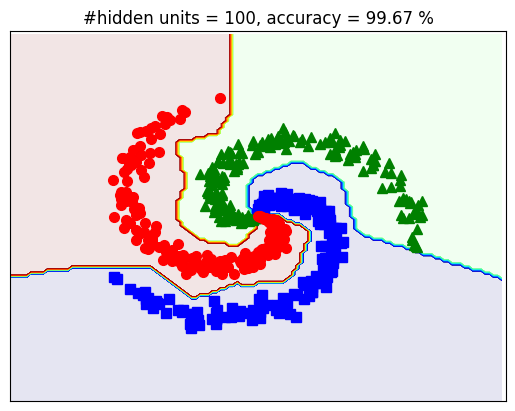

In [ ]:
# Visualize results
xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)

  # xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # xx.ravel(), yy.ravel()
print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)
# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)
X0 = np.vstack((xx1, yy1))
# print(X.shape)
Z1 = np.dot(W1.T, X0) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
# predicted class
Z = np.argmax(Z2, axis=0)
Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)
# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')
# X = X.T
N = 200
print(N)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()

# Bài tập ứng dụng 1

## Các hàm xử lý và chuẩn bị dữ liệu


In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression # Softmax Regression
from scipy import sparse
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

def cost(Y, Yhat):
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]

def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y),
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

# --- XỬ LÝ DỮ LIỆU ---
def load_and_split_iris():
    iris = datasets.load_iris()
    X_raw = iris.data.T  # Transpose để có (Features, Samples)
    y_raw = iris.target

    # Iris có 150 mẫu, 50 mẫu mỗi lớp được sắp xếp tuần tự
    # Class 0: 0-49, Class 1: 50-99, Class 2: 100-149

    # Tạo index cho train và val
    train_idx = []
    val_idx = []

    for i in range(3):
        start = i * 50
        # Lấy 40 mẫu đầu cho train, 10 mẫu sau cho val (theo yêu cầu)
        train_idx.extend(range(start, start + 40))
        val_idx.extend(range(start + 40, start + 50))

    X_train = X_raw[:, train_idx]
    y_train = y_raw[train_idx]
    X_val = X_raw[:, val_idx]
    y_val = y_raw[val_idx]

    # Chuẩn hóa dữ liệu (Rất quan trọng cho ANN)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train.T).T
    X_val = scaler.transform(X_val.T).T

    return X_train, y_train, X_val, y_val

X_train, y_train, X_val, y_val = load_and_split_iris()
Y_train_onehot = convert_labels(y_train, C=3) # Cho ANN

## Mô hình ANN

In [ ]:
class SimpleANN:
    def __init__(self, d0, d1, d2, learning_rate=0.1):
        self.d0 = d0 # Input layer size
        self.d1 = d1 # Hidden layer size
        self.d2 = d2 # Output layer size (Classes)
        self.lr = learning_rate

        # Khởi tạo trọng số ngẫu nhiên
        np.random.seed(42)
        self.W1 = 0.01 * np.random.randn(d1, d0)
        self.b1 = np.zeros((d1, 1))
        self.W2 = 0.01 * np.random.randn(d2, d1)
        self.b2 = np.zeros((d2, 1))

    def forward(self, X):
        # Layer 1
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = np.maximum(0, self.Z1) # Hàm kích hoạt ReLU
        # Layer 2
        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.Yhat = softmax(self.Z2)
        return self.Yhat

    def backward(self, X, Y):
        m = X.shape[1]
        # Gradients cho Layer 2
        dZ2 = self.Yhat - Y
        dW2 = (1/m) * np.dot(dZ2, self.A1.T)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

        # Gradients cho Layer 1 (Backprop qua ReLU)
        dA1 = np.dot(self.W2.T, dZ2)
        dZ1 = dA1 * (self.Z1 > 0) # Đạo hàm ReLU
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

        # Cập nhật trọng số
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def fit(self, X, Y, epochs=2000):
        loss_hist = []
        start_time = time.time()
        for i in range(epochs):
            Yhat = self.forward(X)
            c = cost(Y, Yhat)
            loss_hist.append(c)
            self.backward(X, Y)

        train_time = time.time() - start_time
        return train_time

    def predict(self, X):
        start_time = time.time()
        Yhat = self.forward(X)
        predictions = np.argmax(Yhat, axis=0)
        pred_time = (time.time() - start_time) / X.shape[1] # Thời gian trung bình per sample
        return predictions, pred_time

## Dự đoán và hiển thị kết quả

In [ ]:
def calculate_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_true, y_pred, average='macro', zero_division=0)
    return acc, prec, rec

results = []

# --- 1. ANN EXPERIMENTS (d1 = 100, 75, 50) ---
hidden_sizes = [100, 75, 50]

for h in hidden_sizes:
    model = SimpleANN(d0=X_train.shape[0], d1=h, d2=3, learning_rate=0.1)

    # Training
    t_train = model.fit(X_train, Y_train_onehot, epochs=5000)

    # Validation
    y_pred_val, t_pred_avg = model.predict(X_val)
    acc, prec, rec = calculate_metrics(y_val, y_pred_val)

    results.append({
        "Model": f"ANN (Hidden={h})",
        "Train Time (s)": t_train,
        "Avg Pred Time (s)": t_pred_avg,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    })

# --- 2. SOFTMAX REGRESSION (Logistic Regression) ---
# Sklearn yêu cầu shape (Samples, Features) nên cần transpose X
start_sm = time.time()
sm_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
sm_model.fit(X_train.T, y_train)
t_train_sm = time.time() - start_sm

start_pred_sm = time.time()
y_pred_sm = sm_model.predict(X_val.T)
t_pred_avg_sm = (time.time() - start_pred_sm) / X_val.shape[1]
acc_sm, prec_sm, rec_sm = calculate_metrics(y_val, y_pred_sm)

results.append({
    "Model": "Softmax Regression",
    "Train Time (s)": t_train_sm,
    "Avg Pred Time (s)": t_pred_avg_sm,
    "Accuracy": acc_sm,
    "Precision": prec_sm,
    "Recall": rec_sm
})

# --- 3. NAIVE BAYES ---
start_nb = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train.T, y_train)
t_train_nb = time.time() - start_nb

start_pred_nb = time.time()
y_pred_nb = nb_model.predict(X_val.T)
t_pred_avg_nb = (time.time() - start_pred_nb) / X_val.shape[1]
acc_nb, prec_nb, rec_nb = calculate_metrics(y_val, y_pred_nb)

results.append({
    "Model": "Naive Bayes",
    "Train Time (s)": t_train_nb,
    "Avg Pred Time (s)": t_pred_avg_nb,
    "Accuracy": acc_nb,
    "Precision": prec_nb,
    "Recall": rec_nb
})

# --- HIỂN THỊ KẾT QUẢ ---
df_results = pd.DataFrame(results)
print(df_results.to_string(index=False))

             Model  Train Time (s)  Avg Pred Time (s)  Accuracy  Precision  Recall
  ANN (Hidden=100)        3.243733           0.000004       1.0        1.0     1.0
   ANN (Hidden=75)        1.755894           0.000005       1.0        1.0     1.0
   ANN (Hidden=50)        1.586493           0.000004       1.0        1.0     1.0
Softmax Regression        0.070013           0.000022       1.0        1.0     1.0
       Naive Bayes        0.001594           0.000022       1.0        1.0     1.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


# Ví dụ 2

## Chuẩn bị dữ liệu

In [ ]:
import requests
import os

# 1. Cấu hình đường dẫn GitHub Raw
# Lưu ý: Bạn cần kiểm tra nhánh là 'main' hay 'master' trên repo của bạn
base_url = 'https://raw.githubusercontent.com/tasdus-117/data/main'

# Danh sách các file cần tải
files_to_download = [
    'train-images-idx3-ubyte.gz',
    'train-labels-idx1-ubyte.gz',
    't10k-images-idx3-ubyte.gz',
    't10k-labels-idx1-ubyte.gz'
]

# Thư mục lưu dữ liệu (tạo nếu chưa có)
data_path = 'data'
os.makedirs(data_path, exist_ok=True)

print("Đang bắt đầu tải dữ liệu...")

for file_name in files_to_download:
    save_path = os.path.join(data_path, file_name)

    # Kiểm tra xem file đã tồn tại chưa để tránh tải lại
    if not os.path.exists(save_path):
        url = f"{base_url}/{file_name}"
        print(f"Đang tải: {url}")

        response = requests.get(url)

        # Kiểm tra nếu link đúng (status code 200)
        if response.status_code == 200:
            with open(save_path, 'wb') as f:
                f.write(response.content)
        else:
            print(f"Lỗi: Không tìm thấy file {file_name}. Kiểm tra lại tên nhánh (main/master).")
    else:
        print(f"File {file_name} đã tồn tại.")

print("Hoàn tất!")

# --- CẬP NHẬT LẠI ĐƯỜNG DẪN CỦA BẠN ---
# Bây giờ file đã nằm trong thư mục 'data', bạn trỏ đường dẫn vào đó
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')

Đang bắt đầu tải dữ liệu...
Đang tải: https://raw.githubusercontent.com/tasdus-117/data/main/train-images-idx3-ubyte.gz
Đang tải: https://raw.githubusercontent.com/tasdus-117/data/main/train-labels-idx1-ubyte.gz
Đang tải: https://raw.githubusercontent.com/tasdus-117/data/main/t10k-images-idx3-ubyte.gz
Đang tải: https://raw.githubusercontent.com/tasdus-117/data/main/t10k-labels-idx1-ubyte.gz
Hoàn tất!


In [ ]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)

    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

## a. Giảm số chiều xuống 125 chiều với 5000 ảnh bất kỳ

In [ ]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
print(train_images.shape, train_labels.shape)

/tmp/ipython-input-3629075870.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)


In [ ]:
X = (train_images - train_images.mean(axis=0)) / (train_images.std(axis=0, ddof=0) + 1e-8)
U, S, Vt = np.linalg.svd(X, full_matrices=False)
V_reduced = Vt[:125, :]         # (100, 784)
X_reduced = X.dot(V_reduced.T)  # (5000, 100)
print(X_reduced.shape)

(5000, 125)


## Áp dụng các mô hình phân loại ANN và Multinomial, so sánh, thực hiện mô hình ANN với số chiều tầng ẩn là 150, dự đoán trên cả 2 tập và trả lại kết quả

### Chia train/test

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# --- 1. CHUẨN BỊ DỮ LIỆU (Yêu cầu b) ---
# Chia tập dữ liệu 70% Train - 30% Test
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, train_labels, test_size=0.3, random_state=42, stratify=train_labels
)

# Chuyển nhãn sang One-hot cho việc huấn luyện (cần cho cả Softmax và ANN tự viết)
enc = OneHotEncoder(sparse_output=False)
y_train_onehot = enc.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = enc.transform(y_test.reshape(-1, 1))

print(f"Shape Train: {X_train.shape}, Shape Test: {X_test.shape}")

Shape Train: (3500, 125), Shape Test: (1500, 125)


### Xây dựng class mô hình

In [ ]:
def softmax(Z):
    e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return e_Z / e_Z.sum(axis=1, keepdims=True)

class SoftmaxRegression:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.W = None
        self.b = None

    def fit(self, X, y_onehot):
        n_samples, n_features = X.shape
        n_classes = y_onehot.shape[1]

        # Khởi tạo tham số
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((1, n_classes))

        for i in range(self.epochs):
            # Forward
            scores = np.dot(X, self.W) + self.b
            probs = softmax(scores)

            # Backward (Gradient Descent)
            diff = probs - y_onehot
            dW = (1 / n_samples) * np.dot(X.T, diff)
            db = (1 / n_samples) * np.sum(diff, axis=0, keepdims=True)

            # Update
            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        scores = np.dot(X, self.W) + self.b
        probs = softmax(scores)
        return np.argmax(probs, axis=1)

class SimpleANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lr = learning_rate

        # He Initialization cho ReLU
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(2. / hidden_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = np.maximum(0, self.Z1) # ReLU
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def fit(self, X, y_onehot, epochs=1000):
        n_samples = X.shape[0]

        for i in range(epochs):
            # Forward
            Y_hat = self.forward(X)

            # Backward
            dZ2 = Y_hat - y_onehot
            dW2 = (1/n_samples) * np.dot(self.A1.T, dZ2)
            db2 = (1/n_samples) * np.sum(dZ2, axis=0, keepdims=True)

            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * (self.Z1 > 0) # Đạo hàm ReLU
            dW1 = (1/n_samples) * np.dot(X.T, dZ1)
            db1 = (1/n_samples) * np.sum(dZ1, axis=0, keepdims=True)

            # Update
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def predict(self, X):
        Y_hat = self.forward(X)
        return np.argmax(Y_hat, axis=1)

### Dự đoán và in ra kết quả

In [ ]:
results = []

print("\n--- BẮT ĐẦU HUẤN LUYỆN ---")

# 1. Multinomial Logistic Regression
start_time = time.time()
sm_model = SoftmaxRegression(learning_rate=0.1, epochs=1000)
sm_model.fit(X_train, y_train_onehot)
train_time_sm = time.time() - start_time
acc_sm = accuracy_score(y_test, sm_model.predict(X_test))

results.append(["Softmax Regression", train_time_sm, acc_sm])
print(f"Softmax Regression - Time: {train_time_sm:.4f}s, Accuracy: {acc_sm:.4f}")

# 2. ANN (Hidden Layer = 50 - Mặc định để so sánh)
start_time = time.time()
# Input: 125, Hidden: 50, Output: 10
ann_model = SimpleANN(input_size=125, hidden_size=50, output_size=10, learning_rate=0.1)
ann_model.fit(X_train, y_train_onehot, epochs=1000)
train_time_ann = time.time() - start_time
acc_ann = accuracy_score(y_test, ann_model.predict(X_test))

results.append(["ANN (Hidden=50)", train_time_ann, acc_ann])
print(f"ANN (Hidden=50)    - Time: {train_time_ann:.4f}s, Accuracy: {acc_ann:.4f}")

# --- 4. ANN VỚI HIDDEN LAYER = 150 (Yêu cầu d) ---
print("\n--- YÊU CẦU D: ANN HIDDEN = 150 ---")
start_time = time.time()
ann_150 = SimpleANN(input_size=125, hidden_size=150, output_size=10, learning_rate=0.1)
ann_150.fit(X_train, y_train_onehot, epochs=1000)
train_time_150 = time.time() - start_time

# Dự đoán trên cả 2 tập
pred_train_150 = ann_150.predict(X_train)
pred_test_150 = ann_150.predict(X_test)

acc_train_150 = accuracy_score(y_train, pred_train_150)
acc_test_150 = accuracy_score(y_test, pred_test_150)

results.append(["ANN (Hidden=150)", train_time_150, acc_test_150])

print(f"Training Time: {train_time_150:.4f}s")
print(f"Accuracy on Train: {acc_train_150:.4f}")
print(f"Accuracy on Test:  {acc_test_150:.4f}")

# --- TỔNG HỢP KẾT QUẢ ---
print("\n" + "="*50)
print(f"{'Model':<25} | {'Time (s)':<10} | {'Accuracy':<10}")
print("-" * 50)
for res in results:
    print(f"{res[0]:<25} | {res[1]:<10.4f} | {res[2]:<10.4f}")
print("="*50)


--- BẮT ĐẦU HUẤN LUYỆN ---
Softmax Regression - Time: 14.7527s, Accuracy: 0.9073
ANN (Hidden=50)    - Time: 16.9467s, Accuracy: 0.9207

--- YÊU CẦU D: ANN HIDDEN = 150 ---
Training Time: 42.1056s
Accuracy on Train: 0.9994
Accuracy on Test:  0.9347

Model                     | Time (s)   | Accuracy  
--------------------------------------------------
Softmax Regression        | 14.7527    | 0.9073    
ANN (Hidden=50)           | 16.9467    | 0.9207    
ANN (Hidden=150)          | 42.1056    | 0.9347    


# Ví dụ 3

## Chuẩn bị dữ liệu

In [ ]:
base_url = "https://raw.githubusercontent.com/tasdus-117/data/main/Dry_Bean_Dataset.csv"

print(f"Đang đọc dữ liệu từ: {base_url} ...")
try:
    df = pd.read_csv(base_url)
    print("Tải dữ liệu thành công!")
    print(f"Kích thước: {df.shape} (Mẫu, Cột)")
except Exception as e:
    print(f"Lỗi: Không thể tải file. Vui lòng kiểm tra tên file hoặc đường dẫn.\nChi tiết: {e}")
    # Dừng chương trình nếu không có dữ liệu
    exit()

# ==========================================
# 2. TIỀN XỬ LÝ DỮ LIỆU
# ==========================================
# Tách đặc trưng (X) và nhãn (y)
# Cột cuối cùng là nhãn, các cột còn lại là đặc trưng
X_raw = df.iloc[:, :-1].values
y_raw = df.iloc[:, -1].values

# Mã hóa nhãn (String -> Số: 0, 1, 2...)
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)
class_names = le.classes_

# Chuẩn hóa dữ liệu (StandardScaler) - Rất quan trọng cho ANN và PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

print(f"Các loại đậu: {class_names}")

Đang đọc dữ liệu từ: https://raw.githubusercontent.com/tasdus-117/data/main/Dry_Bean_Dataset.csv ...
Tải dữ liệu thành công!
Kích thước: (13611, 17) (Mẫu, Cột)
Các loại đậu: ['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']


## a. Giảm dữ liệu và trực quan hóa

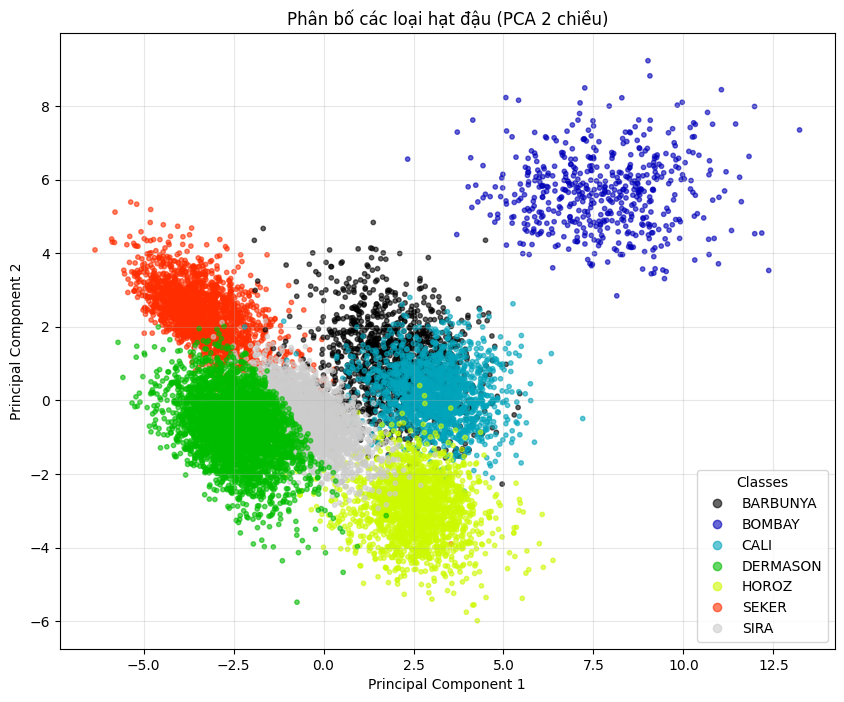

Tỉ lệ thông tin giữ lại (Explained Variance) với 2 chiều: 81.90%


In [ ]:
from sklearn.decomposition import PCA

# Giảm xuống 2 chiều
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Trực quan hóa
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_encoded, cmap='nipy_spectral', alpha=0.6, s=10)
plt.legend(handles=scatter.legend_elements()[0], labels=list(class_names), title="Classes")
plt.title('Phân bố các loại hạt đậu (PCA 2 chiều)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Tỉ lệ thông tin giữ lại (Explained Variance) với 2 chiều: {np.sum(pca_2d.explained_variance_ratio_)*100:.2f}%")

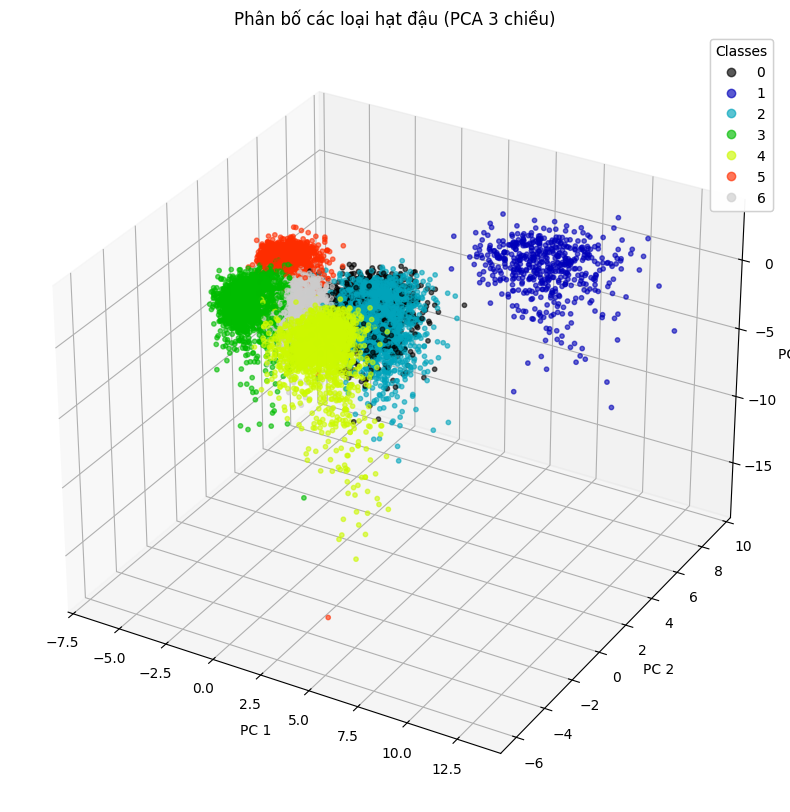

Tỉ lệ thông tin giữ lại (Explained Variance) với 3 chiều: 89.90%


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Cần thư viện này cho 3D

# 1. Giảm xuống 3 chiều
# Đổi tên biến thành _3d cho rõ ràng
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# 2. Trực quan hóa 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')  # Tạo trục 3D

# Vẽ điểm dữ liệu (x=cột 0, y=cột 1, z=cột 2)
scatter = ax.scatter(
    X_pca_3d[:, 0],
    X_pca_3d[:, 1],
    X_pca_3d[:, 2],
    c=y_encoded,
    cmap='nipy_spectral',
    alpha=0.6,
    s=10
)

# Tạo chú thích (Legend)
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="best", title="Classes")
ax.add_artist(legend1)

# Gán nhãn trục
ax.set_title('Phân bố các loại hạt đậu (PCA 3 chiều)')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

plt.show()

# In tỉ lệ thông tin giữ lại
print(f"Tỉ lệ thông tin giữ lại (Explained Variance) với 3 chiều: {np.sum(pca_3d.explained_variance_ratio_)*100:.2f}%")

## Thực hiện Naive Bayes, Multinomial, ANN với dữ liệu gốc

In [ ]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score

# --- 1. CÁC HÀM BỔ TRỢ CHO ANN ---
def softmax(Z):
    # Trừ max để ổn định số học (tránh overflow)
    e_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return e_Z / e_Z.sum(axis=1, keepdims=True)

def to_one_hot(y, num_classes):
    # Chuyển y từ [0, 1, 0, 2...] sang dạng One-hot
    n_samples = y.shape[0]
    one_hot = np.zeros((n_samples, num_classes))
    one_hot[np.arange(n_samples), y] = 1
    return one_hot

# --- 2. XÂY DỰNG CLASS CUSTOM ANN ---
class CustomANN:
    def __init__(self, hidden_size=32, learning_rate=0.01, epochs=1000):
        self.hidden_size = hidden_size
        self.lr = learning_rate
        self.epochs = epochs
        self.W1 = None
        self.b1 = None
        self.W2 = None
        self.b2 = None

    def fit(self, X, y):
        # X shape: (n_samples, n_features)
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y)) # Tự động xác định số lớp (7 loại đậu)

        # Chuyển y sang One-hot để tính toán Loss
        y_onehot = to_one_hot(y, n_classes)

        # Khởi tạo trọng số (nếu chưa có)
        np.random.seed(42)
        # He initialization cho ReLU
        self.W1 = np.random.randn(n_features, self.hidden_size) * np.sqrt(2. / n_features)
        self.b1 = np.zeros((1, self.hidden_size))
        # Xavier initialization cho Softmax
        self.W2 = np.random.randn(self.hidden_size, n_classes) * np.sqrt(1. / self.hidden_size)
        self.b2 = np.zeros((1, n_classes))

        # Vòng lặp huấn luyện
        for i in range(self.epochs):
            # 1. Forward Pass
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = np.maximum(0, Z1) # ReLU Activation
            Z2 = np.dot(A1, self.W2) + self.b2
            Y_hat = softmax(Z2)

            # 2. Backward Pass
            dZ2 = Y_hat - y_onehot
            dW2 = (1/n_samples) * np.dot(A1.T, dZ2)
            db2 = (1/n_samples) * np.sum(dZ2, axis=0, keepdims=True)

            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * (Z1 > 0) # Đạo hàm ReLU
            dW1 = (1/n_samples) * np.dot(X.T, dZ1)
            db1 = (1/n_samples) * np.sum(dZ1, axis=0, keepdims=True)

            # 3. Update Weights
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        Y_hat = softmax(Z2)
        return np.argmax(Y_hat, axis=1) # Trả về nhãn (0, 1, 2...)

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    start = time.time()
    model.fit(X_train, y_train) # CustomANN đã tương thích với lệnh này
    train_time = time.time() - start

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    metrics = {
        "Model": model_name,
        "Time (s)": train_time,
        "Train Acc": accuracy_score(y_train, y_pred_train),
        "Val Acc": accuracy_score(y_test, y_pred_test),
        "Val Precision": precision_score(y_test, y_pred_test, average='weighted', zero_division=0),
        "Val Recall": recall_score(y_test, y_pred_test, average='weighted', zero_division=0)
    }
    return metrics

# --- 4. CHẠY THỰC NGHIỆM ---
# Giả sử bạn đã có X_scaled và y_encoded từ các bước trước
# Chia dữ liệu 7:3
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

results_full = []

# 1. Naive Bayes
nb_model = GaussianNB()
results_full.append(evaluate_model(nb_model, X_train, y_train, X_val, y_val, "Naive Bayes"))

# 2. Softmax Regression
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
results_full.append(evaluate_model(lr_model, X_train, y_train, X_val, y_val, "Softmax Regression"))

# 3. Custom ANN
ann_custom = CustomANN(hidden_size=32, learning_rate=0.1, epochs=2000)
results_full.append(evaluate_model(ann_custom, X_train, y_train, X_val, y_val, "Custom ANN (Hidden-32)"))

# Hiển thị kết quả
df_res_full = pd.DataFrame(results_full)
print("\n=== KẾT QUẢ SO SÁNH ===")
print(df_res_full.to_string(index=False))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== KẾT QUẢ SO SÁNH ===
                 Model  Time (s)  Train Acc  Val Acc  Val Precision  Val Recall
           Naive Bayes  0.004938   0.898289 0.896915       0.899315    0.896915
    Softmax Regression  0.867391   0.926105 0.921645       0.922258    0.921645
Custom ANN (Hidden-32) 26.378091   0.929883 0.925318       0.925978    0.925318


PHÂN TÍCH VÀ ĐÁNH GIÁ KẾT QUẢ THỰC NGHIỆM

1. Về Thời gian thực hiện (Training Time)

Đây là tiêu chí thể hiện sự chênh lệch rõ rệt nhất giữa ba mô hình:

Naive Bayes (0.0049s - Nhanh nhất):

Lý do: Thuật toán này hoạt động dựa trên giả định "Ngây thơ" (Naive). Nó không cần chạy các vòng lặp tối ưu hóa (như Gradient Descent) mà chỉ cần quét qua dữ liệu một lần duy nhất để tính toán các thống kê cơ bản (Mean, Variance) của từng đặc trưng.

Ý nghĩa: Đây là lựa chọn tối ưu cho các hệ thống thời gian thực (Real-time) đòi hỏi tốc độ phản hồi tức thì.

Softmax Regression (0.867s - Trung bình):

Lý do: Mô hình cần giải bài toán tối ưu hóa lồi (Convex Optimization) để tìm ma trận trọng số $W$. Quá trình này đòi hỏi lặp đi lặp lại nhiều lần để giảm thiểu hàm mất mát (Loss function), do đó chậm hơn Naive Bayes.

Custom ANN (26.37s - Chậm nhất):

Lý do: Thời gian chậm gấp ~30 lần Softmax và ~5000 lần Naive Bayes xuất phát từ:

Cấu trúc phức tạp: Phải tính toán qua 2 tầng (Input $\to$ Hidden $\to$ Output) với hàng nghìn phép nhân ma trận.

Lan truyền ngược (Backpropagation): Phải tính đạo hàm ngược từ cuối lên đầu để cập nhật trọng số.

Giới hạn ngôn ngữ: Do lớp CustomANN được viết bằng Python/NumPy thuần (chưa được tối ưu sâu ở cấp độ ngôn ngữ máy C/C++ như thư viện Scikit-learn), tốc độ xử lý vòng lặp còn hạn chế.

2. Về Độ chính xác (Accuracy - Train & Val)

Accuracy phản ánh tỷ lệ dự đoán đúng trên tổng số mẫu. Thứ tự hiệu quả như sau:

Naive Bayes (Val: 89.69% - Thấp nhất):

Giải thích: Mô hình giả định các đặc trưng độc lập với nhau. Tuy nhiên, thực tế các thông số hạt đậu (Diện tích, Chu vi,...) có tương quan rất chặt chẽ. Sự vi phạm giả định này khiến mô hình bị "mất điểm" khi phân loại các mẫu phức tạp.

Softmax Regression (Val: 92.16% - Khá):

Giải thích: Mô hình đã xét đến mối tương quan giữa các đặc trưng, nhưng hạn chế ở chỗ chỉ vẽ được các đường ranh giới tuyến tính (đường thẳng/mặt phẳng) để phân chia dữ liệu.

Custom ANN (Val: 92.53% - Cao nhất):

Giải thích: Nhờ tầng ẩn (Hidden Layer) và hàm kích hoạt phi tuyến (ReLU), ANN có khả năng vẽ các đường cong phức tạp, giúp len lỏi vào ranh giới giữa các loại đậu có hình dáng gần giống nhau (như Seker và Dermason).

Đánh giá Overfitting: Chênh lệch giữa Train Acc (92.98%) và Val Acc (92.53%) rất nhỏ (< 0.5%), chứng tỏ mô hình học tốt và không bị Overfitting (học vẹt).

3. Về Precision và Recall (Trên tập Validation)

Hai chỉ số này xấp xỉ bằng nhau và tương đương với Accuracy, cho thấy:

Val Precision (0.9259): Khi mô hình dự đoán một hạt đậu là loại A, có 92.6% xác suất nó thực sự là loại A $\to$ Tỷ lệ báo động giả (False Positive) thấp.

Val Recall (0.9253): Trong thực tế có 100 hạt đậu loại A, mô hình tìm ra được 92.5 hạt $\to$ Tỷ lệ bỏ sót (False Negative) thấp.

Sự cân bằng: Việc Precision $\approx$ Recall $\approx$ Accuracy cho thấy bộ dữ liệu khá cân bằng (không có loại đậu nào chiếm số lượng áp đảo) và mô hình không bị thiên vị (bias) về một lớp cụ thể nào.

TỔNG KẾT & KIẾN NGHỊ

Về hiệu năng: Custom ANN hoạt động hiệu quả nhất về chất lượng dự đoán (Accuracy cao nhất). Điều này chứng minh thuật toán Backpropagation trong code tự viết đã hoạt động chính xác.

Về sự đánh đổi (Trade-off): Để đạt được độ chính xác cao nhất của ANN, ta phải đánh đổi bằng chi phí tính toán lớn (thời gian huấn luyện lâu nhất).

Kiến nghị triển khai:

Nếu cần độ chính xác tuyệt đối: Chọn ANN.

Nếu triển khai trên thiết bị phần cứng yếu (IoT, nhúng, mobile) cần cân bằng giữa tốc độ và chính xác: Softmax Regression là lựa chọn tốt nhất.

## d. GIảm chiều xuống 4 rồi dự đoán

In [ ]:
from sklearn.decomposition import PCA

# ==========================================
# PHẦN C: GIẢM CHIỀU DỮ LIỆU (PCA = 4)
# ==========================================
print("\n" + "="*30 + " THỰC HIỆN Ý (C): GIẢM CÒN 4 CHIỀU " + "="*30)

# 1. Áp dụng PCA giảm từ 16 xuống 4 chiều
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Tính lượng thông tin giữ lại
variance_ratio = np.sum(pca.explained_variance_ratio_) * 100
print(f"Đã giảm dữ liệu xuống 4 chiều.")
print(f"Tổng lượng thông tin (Variance) giữ lại: {variance_ratio:.2f}%")

# 2. Chia tập dữ liệu PCA (Giữ nguyên random_state để so sánh công bằng)
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(
    X_pca, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

results_pca = []

# 3. Thực hiện lại 3 mô hình trên dữ liệu PCA

# --- Naive Bayes ---
nb_pca = GaussianNB()
results_pca.append(evaluate_model(nb_pca, X_train_pca, y_train_pca, X_val_pca, y_val_pca, "Naive Bayes (PCA)"))

# --- Softmax Regression ---
lr_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
results_pca.append(evaluate_model(lr_pca, X_train_pca, y_train_pca, X_val_pca, y_val_pca, "Softmax Reg (PCA)"))

# --- Custom ANN ---
# Giữ nguyên tham số như phần (b) để so sánh công bằng
ann_pca = CustomANN(hidden_size=32, learning_rate=0.1, epochs=2000)
results_pca.append(evaluate_model(ann_pca, X_train_pca, y_train_pca, X_val_pca, y_val_pca, "Custom ANN (PCA)"))

# 4. Hiển thị kết quả PCA
df_res_pca = pd.DataFrame(results_pca)
print("\n=== KẾT QUẢ TRÊN DỮ LIỆU GIẢM CHIỀU (4D) ===")
print(df_res_pca.to_string(index=False))

# ==========================================
# SO SÁNH VÀ ĐÁNH GIÁ
# ==========================================
print("\n" + "="*30 + " BẢNG SO SÁNH ĐỘ CHÍNH XÁC (VAL ACCURACY) " + "="*30)

# Tạo bảng so sánh
models = ["Naive Bayes", "Softmax Regression", "Custom ANN"]
acc_original = [res['Val Acc'] for res in results_full] # Lấy từ kết quả phần (b) của bạn
acc_pca = [res['Val Acc'] for res in results_pca]

comparison_df = pd.DataFrame({
    "Mô hình": models,
    "Gốc (16 chiều)": acc_original,
    "PCA (4 chiều)": acc_pca
})

# Tính mức độ sụt giảm
comparison_df["Sụt giảm (%)"] = (comparison_df["Gốc (16 chiều)"] - comparison_df["PCA (4 chiều)"]) * 100
print(comparison_df.to_string(index=False, float_format="%.4f"))


============================== THỰC HIỆN Ý (C): GIẢM CÒN 4 CHIỀU ==============================
Đã giảm dữ liệu xuống 4 chiều.
Tổng lượng thông tin (Variance) giữ lại: 95.02%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== KẾT QUẢ TRÊN DỮ LIỆU GIẢM CHIỀU (4D) ===
            Model  Time (s)  Train Acc  Val Acc  Val Precision  Val Recall
Naive Bayes (PCA)  0.004965   0.863546 0.864838       0.865072    0.864838
Softmax Reg (PCA)  0.250949   0.889997 0.889569       0.889512    0.889569
 Custom ANN (PCA) 25.025851   0.895770 0.893732       0.894368    0.893732

============================== BẢNG SO SÁNH ĐỘ CHÍNH XÁC (VAL ACCURACY) ==============================
           Mô hình  Gốc (16 chiều)  PCA (4 chiều)  Sụt giảm (%)
       Naive Bayes          0.8969         0.8648        3.2076
Softmax Regression          0.9216         0.8896        3.2076
        Custom ANN          0.9253         0.8937        3.1587


# Ví dụ 4

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import zipfile
import urllib.request
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Chuẩn bị dữ liệu

In [ ]:
url = "https://github.com/tasdus-117/data/raw/main/face_data.zip"
zip_path = "face_data.zip"
extract_folder = "dataset_unzipped"

if not os.path.exists(zip_path):
    try:
        urllib.request.urlretrieve(url, zip_path)
    except:
        print("Lỗi tải file. Kiểm tra mạng!")

if not os.path.exists(extract_folder):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_folder)

# Tìm đường dẫn
data_path = ''
for root, dirs, files in os.walk(extract_folder):
    for file in files:
        if file.startswith('subject01') and 'centerlight' in file:
            data_path = root + '/'
            break
    if data_path: break

## Hàm và mô hình ANN

In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def to_one_hot(y, n_classes):
    one_hot = np.zeros((len(y), n_classes))
    one_hot[np.arange(len(y)), y] = 1
    return one_hot

class CustomANN:
    def __init__(self, hidden_size=32, learning_rate=0.01, epochs=1000):
        self.hidden_size = hidden_size
        self.lr = learning_rate
        self.epochs = epochs
        self.W1 = None; self.b1 = None
        self.W2 = None; self.b2 = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))
        y_onehot = to_one_hot(y, n_classes)

        np.random.seed(42)
        self.W1 = np.random.randn(n_features, self.hidden_size) * np.sqrt(2. / n_features)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, n_classes) * np.sqrt(1. / self.hidden_size)
        self.b2 = np.zeros((1, n_classes))

        for i in range(self.epochs):
            # Forward
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = np.maximum(0, Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            Y_hat = softmax(Z2)

            # Backward
            dZ2 = Y_hat - y_onehot
            dW2 = (1/n_samples) * np.dot(A1.T, dZ2)
            db2 = (1/n_samples) * np.sum(dZ2, axis=0, keepdims=True)
            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * (Z1 > 0)
            dW1 = (1/n_samples) * np.dot(X.T, dZ1)
            db1 = (1/n_samples) * np.sum(dZ1, axis=0, keepdims=True)

            # Update
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        Y_hat = softmax(Z2)
        return np.argmax(Y_hat, axis=1)

## Đọc dữ liệu

In [ ]:
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink']
prefix = 'subject'; surfix = '.png'

# Đọc 1 ảnh mẫu lấy kích thước
fn_sample = data_path + prefix + '01.' + states[0] + surfix
im = cv2.imread(fn_sample, 0)
h, w = im.shape
D = h * w
N = len(states) * 15

X = np.zeros((D, N))
y = [] # Nhãn bây giờ sẽ là trạng thái (0-10)
count = 0

for person_id in range(1, 16):
    # Duyệt qua từng trạng thái, index i chạy từ 0 đến 10
    for i, state in enumerate(states):
        fn = data_path + prefix + str(person_id).zfill(2) + '.' + state + surfix
        tmp = cv2.imread(fn, cv2.IMREAD_GRAYSCALE)

        if tmp is None: X[:, count] = np.zeros(D)
        else: X[:, count] = tmp.reshape(D)

        # --- THAY ĐỔI QUAN TRỌNG Ở ĐÂY ---
        # Thay vì append(person_id), ta append(i)
        # i là vị trí của trạng thái trong list 'states'
        y.append(i)
        count += 1

y = np.array(y)
X = X.T # (165, D)
print(f"Đã load dữ liệu. Số lớp (classes): {len(np.unique(y))} (tương ứng 11 trạng thái)")

Đã load dữ liệu. Số lớp (classes): 11 (tương ứng 11 trạng thái)


## a. Giảm chiều xuống còn 125

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=125)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
print(X_pca.shape)

(165, 125)


## b. Dự đoán và đưa ra kết quả

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Logistic Regression
model_lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
model_lr.fit(X_train, y_train)
print(f"Acc (Logistic): {accuracy_score(y_test, model_lr.predict(X_test)):.4f}")

# Naive Bayes
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
print(f"Acc (Naive Bayes): {accuracy_score(y_test, model_nb.predict(X_test)):.4f}")

# Custom ANN
model_ann = CustomANN(hidden_size=128, learning_rate=0.1, epochs=3000)
model_ann.fit(X_train, y_train)
print(f"Acc (Custom ANN): {accuracy_score(y_test, model_ann.predict(X_test)):.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Acc (Logistic): 0.2800
Acc (Naive Bayes): 0.1400


/tmp/ipython-input-3138717973.py:2: RuntimeWarning: overflow encountered in subtract
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
/tmp/ipython-input-3138717973.py:2: RuntimeWarning: invalid value encountered in subtract
  exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))


Acc (Custom ANN): 0.0800


## c. Lấy 5 ảnh bất kỳ đưa về shape ban đầu, dịch phải và dự đoán

In [ ]:
# Train lại mô hình tốt nhất trên toàn bộ dữ liệu
final_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000)
final_model.fit(X_pca, y)

# Tạo ảnh giả lập nếu chưa có ảnh thật (Bạn nên upload ảnh thật vào)
test_images = ['test1.jpg', 'test2.jpg', 'test3.jpg', 'test4.jpg', 'test5.jpg']
for name in test_images:
    if not os.path.exists(name):
        cv2.imwrite(name, np.random.randint(0, 255, (300, 300), dtype=np.uint8))

print("Kết quả dự đoán cho 5 ảnh mới:")
for img_name in test_images:
    img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
    if img is None: continue

    # 1. Resize & Dịch phải (Yêu cầu đề bài)
    img_resized = cv2.resize(img, (w, h))
    M = np.float32([[1, 0, int(w*0.2)], [0, 1, 0]]) # Dịch phải 20%
    img_shifted = cv2.warpAffine(img_resized, M, (w, h))

    # 2. Xử lý PCA
    img_flat = img_shifted.reshape(1, -1)
    img_scaled = scaler.transform(img_flat)
    img_pca_new = pca.transform(img_scaled)

    # 3. Dự đoán
    pred_index = final_model.predict(img_pca_new)[0]
    predicted_state = states[pred_index] # Lấy tên trạng thái từ index

    print(f"-> Ảnh '{img_name}' có trạng thái là: {predicted_state}")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Kết quả dự đoán cho 5 ảnh mới:
-> Ảnh 'test1.jpg' có trạng thái là: rightlight
-> Ảnh 'test2.jpg' có trạng thái là: rightlight
-> Ảnh 'test3.jpg' có trạng thái là: rightlight
-> Ảnh 'test4.jpg' có trạng thái là: rightlight
-> Ảnh 'test5.jpg' có trạng thái là: rightlight


# MULTI LAYER PERCEPTRON CHO BÀI TOÁN REGRESSION

# Bài 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import io
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Chuẩn bị dữ liệu

In [ ]:
url = "https://raw.githubusercontent.com/tasdus-117/data/main/SAT_GPA.csv"

try:
    response = requests.get(url)
    response.raise_for_status() # Kiểm tra lỗi kết nối
    df = pd.read_csv(io.StringIO(response.text))
    print("Tải dữ liệu thành công!")
    print(df.head()) # In 5 dòng đầu kiểm tra
except Exception as e:
    print(f"Lỗi tải dữ liệu: {e}")
    # Dừng chương trình nếu không có dữ liệu
    raise

Tải dữ liệu thành công!
    SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83


In [ ]:
X = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)

## Chuẩn hóa dữ liệu

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

## Chia train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled,
                                                    train_size=54, test_size=30,
                                                    random_state=42, shuffle=True)

print(f"\nSố mẫu Train: {X_train.shape[0]}")
print(f"Số mẫu Test: {X_test.shape[0]}")


Số mẫu Train: 54
Số mẫu Test: 30


## Mô hình ANN

In [ ]:
class ANN_Regression:
    def __init__(self, hidden_size=32, learning_rate=0.01, epochs=1000):
        self.hidden_size = hidden_size
        self.lr = learning_rate
        self.epochs = epochs
        self.params = {}
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_outputs = 1

        # Khởi tạo tham số
        np.random.seed(42)
        # He Init cho ReLU
        self.params['W1'] = np.random.randn(n_features, self.hidden_size) * np.sqrt(2./n_features)
        self.params['b1'] = np.zeros((1, self.hidden_size))
        # Xavier Init cho Linear Output
        self.params['W2'] = np.random.randn(self.hidden_size, n_outputs) * np.sqrt(1./self.hidden_size)
        self.params['b2'] = np.zeros((1, n_outputs))

        for i in range(self.epochs):
            # 1. Forward Pass
            Z1 = np.dot(X, self.params['W1']) + self.params['b1']
            A1 = np.maximum(0, Z1) # ReLU
            Z2 = np.dot(A1, self.params['W2']) + self.params['b2']
            y_hat = Z2 # Linear Activation (f(z) = z) -> QUAN TRỌNG CHO HỒI QUY

            # Tính Loss (MSE)
            loss = np.mean((y_hat - y) ** 2)
            self.loss_history.append(loss)

            # 2. Backward Pass
            dZ2 = (y_hat - y) # Đạo hàm MSE với Linear Output

            dW2 = (1/n_samples) * np.dot(A1.T, dZ2)
            db2 = (1/n_samples) * np.sum(dZ2, axis=0, keepdims=True)

            dA1 = np.dot(dZ2, self.params['W2'].T)
            dZ1 = dA1 * (Z1 > 0) # Đạo hàm ReLU
            dW1 = (1/n_samples) * np.dot(X.T, dZ1)
            db1 = (1/n_samples) * np.sum(dZ1, axis=0, keepdims=True)

            # 3. Update
            self.params['W1'] -= self.lr * dW1
            self.params['b1'] -= self.lr * db1
            self.params['W2'] -= self.lr * dW2
            self.params['b2'] -= self.lr * db2

    def predict(self, X):
        Z1 = np.dot(X, self.params['W1']) + self.params['b1']
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.params['W2']) + self.params['b2']
        return Z2

## Hàm đánh giá

In [ ]:
def evaluate_model(model_name, y_true_scaled, y_pred_scaled, scaler_y):
    # Inverse scale về điểm gốc (GPA 0.0 - 4.0)
    y_true = scaler_y.inverse_transform(y_true_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled)

    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

## Chạy với các mô hình và so sánh

In [ ]:
# --- MODEL 1: ANN (Default hidden=32) ---
start_t = time.time()
ann = ANN_Regression(hidden_size=32, learning_rate=0.01, epochs=2000)
ann.fit(X_train, y_train)
train_time_ann = time.time() - start_t

start_p = time.time()
y_pred_ann = ann.predict(X_test)
pred_time_ann = (time.time() - start_p) / len(X_test) * 1000 # ms/sample

mse_ann, r2_ann = evaluate_model("ANN", y_test, y_pred_ann, scaler_y)

# --- MODEL 2: Linear Regression (Sklearn) ---
start_t = time.time()
lr = LinearRegression()
lr.fit(X_train, y_train)
train_time_lr = time.time() - start_t

start_p = time.time()
y_pred_lr = lr.predict(X_test)
pred_time_lr = (time.time() - start_p) / len(X_test) * 1000 # ms/sample

mse_lr, r2_lr = evaluate_model("LinearReg", y_test, y_pred_lr, scaler_y)

# --- IN KẾT QUẢ SO SÁNH ---
print(f"{'Metrics':<20} | {'ANN (Hidden=32)':<15} | {'Linear Regression':<15}")
print("-" * 60)
print(f"{'MSE (Càng nhỏ tốt)':<20} | {mse_ann:.5f}          | {mse_lr:.5f}")
print(f"{'R2 Score (Gần 1 tốt)':<20} | {r2_ann:.5f}          | {r2_lr:.5f}")
print(f"{'Train Time (s)':<20} | {train_time_ann:.5f}          | {train_time_lr:.5f}")
print(f"{'Pred Time (ms/sample)':<20} | {pred_time_ann:.5f}          | {pred_time_lr:.5f}")

Metrics              | ANN (Hidden=32) | Linear Regression
------------------------------------------------------------
MSE (Càng nhỏ tốt)   | 0.04425          | 0.04548
R2 Score (Gần 1 tốt) | 0.39677          | 0.38010
Train Time (s)       | 0.34563          | 0.00207
Pred Time (ms/sample) | 0.00869          | 0.01631


## Chạy với các tầng ẩn khác nhau

Hidden Size     | MSE             | R2 Score       
--------------------------------------------------
32              | 0.04425         | 0.39677
50              | 0.04408         | 0.39920
75              | 0.04401         | 0.40010


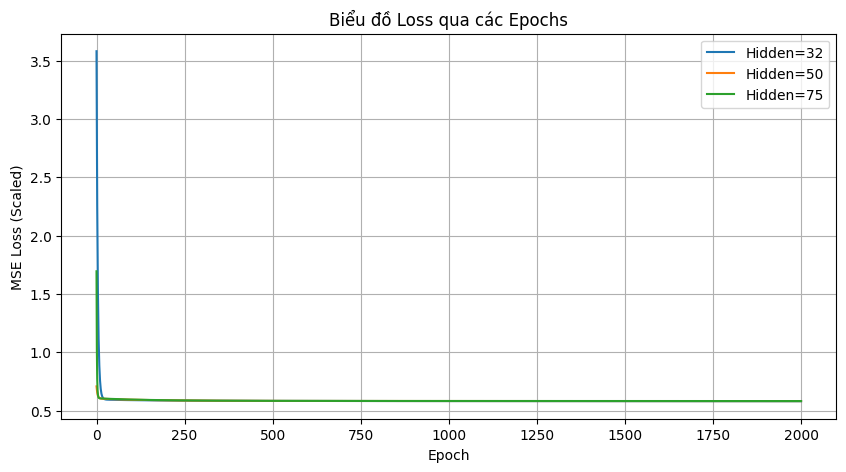

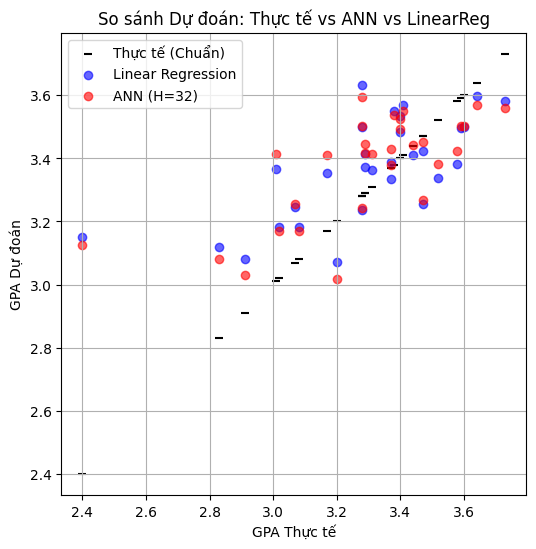

In [ ]:
hidden_sizes = [32, 50, 75]

print(f"{'Hidden Size':<15} | {'MSE':<15} | {'R2 Score':<15}")
print("-" * 50)

loss_histories = {}

for h in hidden_sizes:
    # Train mới hoàn toàn
    model = ANN_Regression(hidden_size=h, learning_rate=0.01, epochs=2000)
    model.fit(X_train, y_train)
    loss_histories[h] = model.loss_history

    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(f"H={h}", y_test, y_pred, scaler_y)

    print(f"{h:<15} | {mse:.5f}         | {r2:.5f}")

# Vẽ đồ thị Loss
plt.figure(figsize=(10, 5))
for h in hidden_sizes:
    plt.plot(loss_histories[h], label=f'Hidden={h}')
plt.title('Biểu đồ Loss qua các Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss (Scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Vẽ biểu đồ phân tán kết quả dự đoán
plt.figure(figsize=(6, 6))
# Dữ liệu gốc
y_test_real = scaler_y.inverse_transform(y_test)
y_pred_lr_real = scaler_y.inverse_transform(y_pred_lr)
y_pred_ann_real = scaler_y.inverse_transform(ann.predict(X_test))

plt.scatter(y_test_real, y_test_real, color='black', label='Thực tế (Chuẩn)', marker='_')
plt.scatter(y_test_real, y_pred_lr_real, color='blue', label='Linear Regression', alpha=0.6)
plt.scatter(y_test_real, y_pred_ann_real, color='red', label='ANN (H=32)', alpha=0.6)
plt.xlabel('GPA Thực tế')
plt.ylabel('GPA Dự đoán')
plt.title('So sánh Dự đoán: Thực tế vs ANN vs LinearReg')
plt.legend()
plt.grid(True)
plt.show()

# Bài 2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Chuẩn bị dữ liệu

In [ ]:
url = "https://raw.githubusercontent.com/tasdus-117/data/main/vidu4_lin_reg.txt"

try:
    response = requests.get(url)
    response.raise_for_status()
    # Đọc file text, phân tách bằng khoảng trắng (sep='\s+')
    df = pd.read_csv(io.StringIO(response.text), sep='\s+')
    print("Tải dữ liệu thành công!")
    print(df.head())
except Exception as e:
    print(f"Lỗi tải dữ liệu: {e}")
    raise

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-849563387.py:7: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(io.StringIO(response.text), sep='\s+')


Tải dữ liệu thành công!
   ID  TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYNTM
0   1    56   21  160     14.0         6.00      1.95
1   2    76   18  150     12.0         4.97      1.33
2   3    63   16  160      4.4         6.39      0.83
3   4    78   20  100      4.0         7.00      2.00
4   5    87   20  110      4.6         4.10      1.30


## Tiền xử lý

In [ ]:
X_raw = df[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']].values
y_raw = df[['BEDAYNTM']].values

# --- CHUẨN HÓA (Scaling) ---
# Rất quan trọng vì GLUCOSE (~100) lớn gấp trăm lần BEDAYNTM (~1.0)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw)

In [ ]:
split_index = 80
X_train = X_scaled[:split_index]
y_train = y_scaled[:split_index]

X_test = X_scaled[split_index:]
y_test = y_scaled[split_index:]

print(f"\nKích thước tập Train: {X_train.shape}") # (80, 5)
print(f"Kích thước tập Test: {X_test.shape}")   # (20, 5)


Kích thước tập Train: (80, 5)
Kích thước tập Test: (20, 5)


## Mô hình ANN

In [ ]:
class ANN_Regression_Multi:
    def __init__(self, input_size, hidden_size=32, learning_rate=0.01, epochs=2000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []
        self.params = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_outputs = 1

        np.random.seed(42)
        # He Init
        self.params['W1'] = np.random.randn(n_features, self.hidden_size) * np.sqrt(2./n_features)
        self.params['b1'] = np.zeros((1, self.hidden_size))
        # Xavier Init
        self.params['W2'] = np.random.randn(self.hidden_size, n_outputs) * np.sqrt(1./self.hidden_size)
        self.params['b2'] = np.zeros((1, n_outputs))

        for i in range(self.epochs):
            # Forward
            Z1 = np.dot(X, self.params['W1']) + self.params['b1']
            A1 = np.maximum(0, Z1) # ReLU
            Z2 = np.dot(A1, self.params['W2']) + self.params['b2']
            y_hat = Z2 # Linear Activation

            # Loss (MSE)
            loss = np.mean((y_hat - y) ** 2)
            self.loss_history.append(loss)

            # Backward
            dZ2 = y_hat - y
            dW2 = (1/n_samples) * np.dot(A1.T, dZ2)
            db2 = (1/n_samples) * np.sum(dZ2, axis=0, keepdims=True)

            dA1 = np.dot(dZ2, self.params['W2'].T)
            dZ1 = dA1 * (Z1 > 0)
            dW1 = (1/n_samples) * np.dot(X.T, dZ1)
            db1 = (1/n_samples) * np.sum(dZ1, axis=0, keepdims=True)

            # Update
            self.params['W1'] -= self.lr * dW1
            self.params['b1'] -= self.lr * db1
            self.params['W2'] -= self.lr * dW2
            self.params['b2'] -= self.lr * db2

    def predict(self, X):
        Z1 = np.dot(X, self.params['W1']) + self.params['b1']
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.params['W2']) + self.params['b2']
        return Z2

In [ ]:
def get_metrics(y_true_scaled, y_pred_scaled, scaler):
    # Đưa về đơn vị gốc (mm) để tính toán dễ hình dung
    y_true = scaler.inverse_transform(y_true_scaled)
    y_pred = scaler.inverse_transform(y_pred_scaled)
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

## Dự đoán và in ra kết quả

--- Training Linear Regression ---

MODEL      | SET    | MSE (mm^2)      | R2 Score  
ANN        | Train  | 0.04341          | 0.6635
ANN        | Test    | 0.28688          | 0.0091
------------------------------------------------------------
LinReg     | Train  | 0.10618          | 0.1768
LinReg     | Test    | 0.22740          | 0.2145


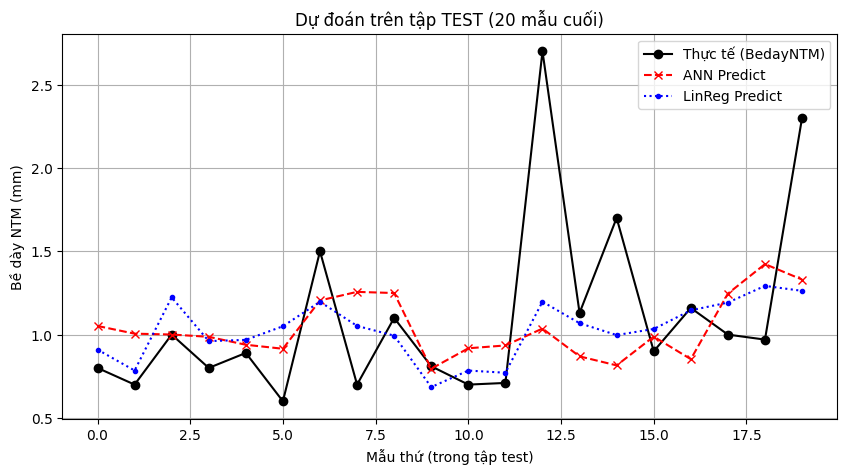

In [ ]:
ann = ANN_Regression_Multi(input_size=5, hidden_size=64, learning_rate=0.01, epochs=3000)
ann.fit(X_train, y_train)

# Dự đoán
y_train_pred_ann = ann.predict(X_train)
y_test_pred_ann = ann.predict(X_test)

# Đánh giá
mse_train_ann, r2_train_ann = get_metrics(y_train, y_train_pred_ann, scaler_y)
mse_test_ann, r2_test_ann = get_metrics(y_test, y_test_pred_ann, scaler_y)

# --- MODEL 2: LINEAR REGRESSION ---
print("--- Training Linear Regression ---")
lr = LinearRegression()
lr.fit(X_train, y_train)

# Dự đoán
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

# Đánh giá
mse_train_lr, r2_train_lr = get_metrics(y_train, y_train_pred_lr, scaler_y)
mse_test_lr, r2_test_lr = get_metrics(y_test, y_test_pred_lr, scaler_y)

# ============================================================
# 5. KẾT QUẢ SO SÁNH
# ============================================================
print("\n" + "="*60)
print(f"{'MODEL':<10} | {'SET':<6} | {'MSE (mm^2)':<15} | {'R2 Score':<10}")
print("="*60)
print(f"{'ANN':<10} | {'Train':<6} | {mse_train_ann:.5f}          | {r2_train_ann:.4f}")
print(f"{'ANN':<10} | {'Test':<6}  | {mse_test_ann:.5f}          | {r2_test_ann:.4f}")
print("-" * 60)
print(f"{'LinReg':<10} | {'Train':<6} | {mse_train_lr:.5f}          | {r2_train_lr:.4f}")
print(f"{'LinReg':<10} | {'Test':<6}  | {mse_test_lr:.5f}          | {r2_test_lr:.4f}")
print("="*60)

# Biểu đồ so sánh trên tập Test
plt.figure(figsize=(10, 5))
y_test_real = scaler_y.inverse_transform(y_test)
y_ann_real = scaler_y.inverse_transform(y_test_pred_ann)
y_lr_real = scaler_y.inverse_transform(y_test_pred_lr)

plt.plot(y_test_real, label='Thực tế (BedayNTM)', marker='o', color='black')
plt.plot(y_ann_real, label='ANN Predict', marker='x', linestyle='--', color='red')
plt.plot(y_lr_real, label='LinReg Predict', marker='.', linestyle=':', color='blue')

plt.title('Dự đoán trên tập TEST (20 mẫu cuối)')
plt.ylabel('Bề dày NTM (mm)')
plt.xlabel('Mẫu thứ (trong tập test)')
plt.legend()
plt.grid()
plt.show()

# Bài 3

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Chuẩn bị dữ liệu

In [3]:
url = "https://raw.githubusercontent.com/tasdus-117/data/main/real_estate.csv"

try:
    response = requests.get(url)
    response.raise_for_status()
    df = pd.read_csv(io.StringIO(response.text))
    print("Tải thành công! Dữ liệu gốc:")
    print(df.head(3))
except Exception as e:
    print(f"Lỗi tải dữ liệu: {e}")
    raise

Tải thành công! Dữ liệu gốc:
   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  


In [4]:
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values.reshape(-1, 1) # Reshape y thành cột (N, 1)

# Xử lý cột Ngày (Cột index 0 trong mảng X): Lấy phần nguyên (VD: 2012.917 -> 2012)
X[:, 0] = X[:, 0].astype(int)

## Chia train/test

In [5]:
split_index = 350
X_train_raw = X[:split_index]
y_train = y[:split_index]
X_val_raw = X[split_index:]
y_val = y[split_index:]

## Chuẩn hóa dữ liệu

In [6]:
scaler = StandardScaler()
# Fit scaler trên tập train
X_train = scaler.fit_transform(X_train_raw)
# Transform tập validation theo scaler của train
X_val = scaler.transform(X_val_raw)

print(f"Kích thước tập Train: {X_train.shape}")
print(f"Kích thước tập Validation: {X_val.shape}")

Kích thước tập Train: (350, 6)
Kích thước tập Validation: (64, 6)


## Mô hình Linear Regression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_val)

# Tính Tổng bình phương sai số (SSE) cho Linear Regression
sse_lin = np.sum((y_val - y_pred_lin) ** 2)
print("\n--- KẾT QUẢ LINEAR REGRESSION ---")
print(f"Tổng bình phương sai số (SSE): {sse_lin:.4f}")


--- KẾT QUẢ LINEAR REGRESSION ---
Tổng bình phương sai số (SSE): 4083.6448


## Mô hình ANN

In [8]:
class ANN_Regression_Multi:
    def __init__(self, input_size, hidden_size=32, learning_rate=0.01, epochs=2000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []
        self.params = {}

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_outputs = 1
        np.random.seed(42)
        # He Init
        self.params['W1'] = np.random.randn(n_features, self.hidden_size) * np.sqrt(2./n_features)
        self.params['b1'] = np.zeros((1, self.hidden_size))
        # Xavier Init
        self.params['W2'] = np.random.randn(self.hidden_size, n_outputs) * np.sqrt(1./self.hidden_size)
        self.params['b2'] = np.zeros((1, n_outputs))

        for i in range(self.epochs):
            # Forward
            Z1 = np.dot(X, self.params['W1']) + self.params['b1']
            A1 = np.maximum(0, Z1) # ReLU
            Z2 = np.dot(A1, self.params['W2']) + self.params['b2']
            y_hat = Z2 # Linear Output

            # Loss (MSE) used for gradient
            loss = np.mean((y_hat - y) ** 2)
            self.loss_history.append(loss)

            # Backward
            dZ2 = y_hat - y
            dW2 = (1/n_samples) * np.dot(A1.T, dZ2)
            db2 = (1/n_samples) * np.sum(dZ2, axis=0, keepdims=True)

            dA1 = np.dot(dZ2, self.params['W2'].T)
            dZ1 = dA1 * (Z1 > 0)
            dW1 = (1/n_samples) * np.dot(X.T, dZ1)
            db1 = (1/n_samples) * np.sum(dZ1, axis=0, keepdims=True)

            # Update
            self.params['W1'] -= self.lr * dW1
            self.params['b1'] -= self.lr * db1
            self.params['W2'] -= self.lr * dW2
            self.params['b2'] -= self.lr * db2

    def predict(self, X):
        Z1 = np.dot(X, self.params['W1']) + self.params['b1']
        A1 = np.maximum(0, Z1)
        Z2 = np.dot(A1, self.params['W2']) + self.params['b2']
        return Z2

In [10]:
ann = ANN_Regression_Multi(input_size=X_train.shape[1], hidden_size=64, learning_rate=0.01, epochs=2000)
ann.fit(X_train, y_train)

# Dự đoán trên tập Validation
y_pred_ann = ann.predict(X_val)

# Tính Tổng bình phương sai số (SSE) cho ANN
sse_ann = np.sum((y_val - y_pred_ann) ** 2)
print("\n--- KẾT QUẢ CUSTOM ANN ---")
print(f"Tổng bình phương sai số (SSE): {sse_ann:.4f}")


--- KẾT QUẢ CUSTOM ANN ---
Tổng bình phương sai số (SSE): 2433.6245


## So sánh mô hình ANN và Linear Regression

=> ANN hoạt động tốt hơn Linear Regression.


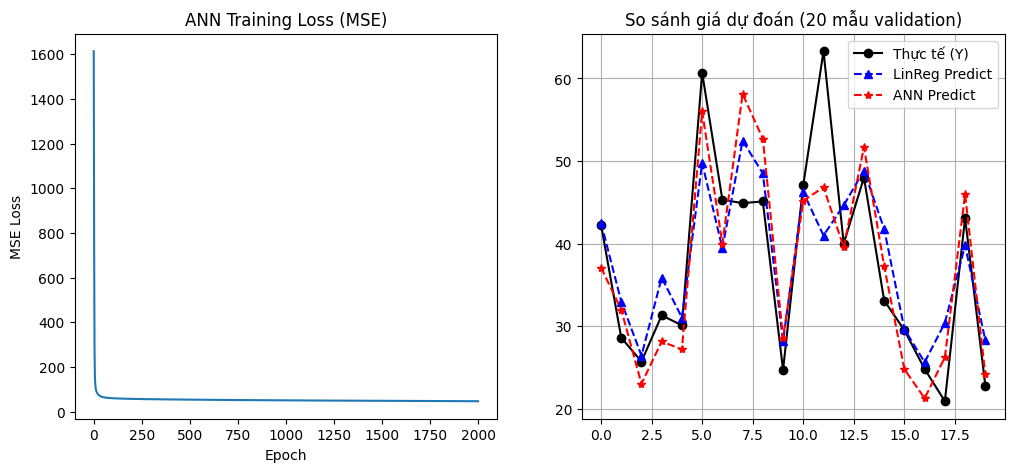

In [11]:
if sse_ann < sse_lin:
    print("=> ANN hoạt động tốt hơn Linear Regression.")
else:
    print("=> Linear Regression hoạt động tốt hơn (hoặc tương đương) ANN trên tập dữ liệu nhỏ này.")

# Vẽ biểu đồ Loss của ANN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ann.loss_history)
plt.title("ANN Training Loss (MSE)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")

# Vẽ biểu đồ so sánh kết quả thực tế vs dự đoán (trên 20 mẫu đầu của tập Val cho dễ nhìn)
plt.subplot(1, 2, 2)
sample_range = range(20) # Lấy 20 mẫu đầu validation
plt.plot(sample_range, y_val[sample_range], 'ko-', label='Thực tế (Y)')
plt.plot(sample_range, y_pred_lin[sample_range], 'b^--', label='LinReg Predict')
plt.plot(sample_range, y_pred_ann[sample_range], 'r*--', label='ANN Predict')
plt.title("So sánh giá dự đoán (20 mẫu validation)")
plt.legend()
plt.grid(True)
plt.show()